In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
1. 도수분포표를 그리고 시각화 하시요.
2. 대표값 3개를 구하시요
(평균,중앙값,대표값)
3. 분산, 표준편차를 구하시요.
4. 공분산을 구하시요
5. cars데이터를 정규화 하시요.
6. 상관계수를 구하고 히트맵을 그리시요.

In [17]:
cardf = pd.read_csv( '../../data/cars.csv')

cardf.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [19]:
speed = cardf['speed']
dist  = cardf['dist']

### 5. cars데이터를 정규화 하시요. 

#### Speed 정규화

In [70]:
# 편차 / 표준편차
z_speed = (speed - speed.mean()) / speed.std()
print(z_speed.mean())
print(z_speed.std())

-9.325873406851315e-17
1.0000000000000002


#### Dist 정규화

In [72]:
# 편차 / 표준편차
z_dist = (dist - dist.mean()) / dist.std()
print(z_dist.mean())
print(z_dist.std())

1.4210854715202004e-16
0.9999999999999999


In [77]:
z_cardf = pd.DataFrame([speed,z_speed,dist,z_dist])
z_cardf = z_cardf.T

z_cardf.iloc[:5]

,speed,speed,dist,dist
0,4.0,-2.155969,2.0,-1.590260
1,4.0,-2.155969,10.0,-1.279814
2,7.0,-1.588609,4.0,-1.512648
3,7.0,-1.588609,22.0,-0.814145
4,8.0,-1.399489,16.0,-1.046979


### 6. 상관계수를 구하고 히트맵을 그리시요.


In [36]:
# 공분산 구하는 함수
def covariance(X, Y): 
    ax, ay = X.mean(), Y.mean()
    data = [round((x-ax)*(y-ay),2) for x, y in zip(X, Y)]
    # print('data:',data)
    return sum(data) / len(X)

In [59]:
# 상관계수 = 공분산 / 각 표준편차의 곱한 값을 나눔
# speed, speed
cor_car1 = covariance(speed, speed) / (np.std(speed) * np.std(speed))
cor_car1

1.0

In [60]:
# 상관계수 = 공분산 / 각 표준편차의 곱한 값을 나눔
# dist, dist
cor_car2 = covariance(dist, dist) / (np.std(dist) * np.std(dist))
cor_car2

0.9999993853525829

In [61]:
# 상관계수 = 공분산 / 각 표준편차의 곱한 값을 나눔
# speed, dist
cor_car3 = covariance(speed, dist) / (np.std(speed) * np.std(dist))
cor_car3

0.8068799232436767

In [98]:
# 데이터프레임으로 만들기
car_corr = [[cor_car1,cor_car3],
            [cor_car3,cor_car2]]
car_corr_df = pd.DataFrame(car_corr)
car_corr_df 

,0,1
0,1.00000,0.806880
1,0.80688,0.999999


In [99]:
# 컬럼명, 인덱스명 변경
car_corr_df = car_corr_df.rename({0:'speed',1:'dist'})
car_corr_df = car_corr_df.rename({0:'speed',1:'dist'}, axis=1)
car_corr_df

,speed,dist
speed,1.00000,0.806880
dist,0.80688,0.999999


#### seaborn 이용

In [101]:
import seaborn as sns

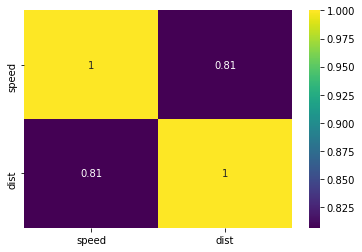

In [106]:
sns.heatmap(car_corr_df, cmap='viridis', annot=True)
plt.show()    